
# Importing the Necessary Libraries


In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Dataset

In [82]:
df = pd.read_excel("employee_burnout_analysis-AI 2.xlsx")

# Data Overview

In [83]:
df.shape


(22750, 9)

In [84]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [85]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [87]:
df.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [88]:
df.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [89]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [90]:
df.duplicated().sum()

0

In [91]:
df.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


# Exploratory Data Analysis


In [92]:
df.corr(numeric_only=True)["Burn Rate"][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [93]:
data = df.copy()

In [94]:
data = data.dropna()

In [95]:
data.corr(numeric_only=True)["Burn Rate"][:-1]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389


 Mean :


In [96]:
d_mean = df.copy()

In [97]:
d_mean["Resource Allocation"].fillna(df["Resource Allocation"].mean(), inplace=True)
d_mean["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mean(), inplace=True)
d_mean["Burn Rate"].fillna(df["Burn Rate"].mean(), inplace=True)

<ipython-input-97-14023b3a5733>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_mean["Resource Allocation"].fillna(df["Resource Allocation"].mean(), inplace=True)
<ipython-input-97-14023b3a5733>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [98]:
d_mean.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [99]:
d_mean.corr(numeric_only=True)["Burn Rate"][:-1]

,Burn Rate
Designation,0.719284
Resource Allocation,0.811062
Mental Fatigue Score,0.878217


 Median :

In [100]:
d_med = df.copy()

In [101]:
d_med["Resource Allocation"].fillna(df["Resource Allocation"].median(), inplace=True)
d_med["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].median(), inplace=True)
d_med["Burn Rate"].fillna(df["Burn Rate"].median(), inplace=True)

<ipython-input-101-0c146a033224>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_med["Resource Allocation"].fillna(df["Resource Allocation"].median(), inplace=True)
<ipython-input-101-0c146a033224>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [102]:
d_med.corr(numeric_only=True)["Burn Rate"][:-1]

,Burn Rate
Designation,0.719283
Resource Allocation,0.809938
Mental Fatigue Score,0.877903


 Mode :

In [103]:
d_mode = df.copy()

In [104]:
d_mode["Resource Allocation"].fillna(df["Resource Allocation"].mode()[0], inplace=True)
d_mode["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mode()[0], inplace=True)
d_mode["Burn Rate"].fillna(df["Burn Rate"].mode()[0], inplace=True)

<ipython-input-104-bbbe3045ec42>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_mode["Resource Allocation"].fillna(df["Resource Allocation"].mode()[0], inplace=True)
<ipython-input-104-bbbe3045ec42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [105]:
d_mode.corr(numeric_only=True)["Burn Rate"][:-1]

,Burn Rate
Designation,0.719134
Resource Allocation,0.809623
Mental Fatigue Score,0.877205


# Selecting the Best Data [from Deleted Null Values, Mean Data, Median Data, Mode Data]

In [106]:
df = data.copy()

In [107]:
df.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [108]:
df.shape

(18590, 9)

Checking if Employee Date of Joining is Relevant or not :

In [109]:
date_data = pd.to_datetime("2008-12-31")

In [110]:
df["Working Days"] = (date_data - df['Date of Joining']).dt.days

In [111]:
df["Working Days"] = df["Working Days"].astype(float)

In [112]:
numeric_Data = df.select_dtypes(include=[float])

In [113]:
numeric_Data.corr()["Burn Rate"]

,Burn Rate
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Working Days,-0.000309


Here we can see that Working Days is not Viable. So deleting it.

In [114]:
df = df.drop(["Date of Joining", "Working Days"], axis=1)

And the Column "Employee ID" is not needed to Find "Burn Data". So deleting it.

In [115]:
df = df.drop(["Employee ID"], axis=1)

In [116]:
df.nunique()

,0
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [117]:
df = pd.get_dummies(df, columns=["Gender", "Company Type", "WFH Setup Available"], drop_first=True)

In [118]:
import seaborn as sns

In [132]:
df

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,2,3.0,3.8,0.16,False,True,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,False,True,False
5,2,4.0,3.6,0.29,True,False,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,False,True
22744,3,7.0,6.2,0.54,True,False,False
22746,3,6.0,6.7,0.59,False,False,True
22748,2,5.0,5.9,0.52,False,True,False


In [138]:
df.dtypes

,0
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64
Gender_Male,bool
Company Type_Service,bool
WFH Setup Available_Yes,bool


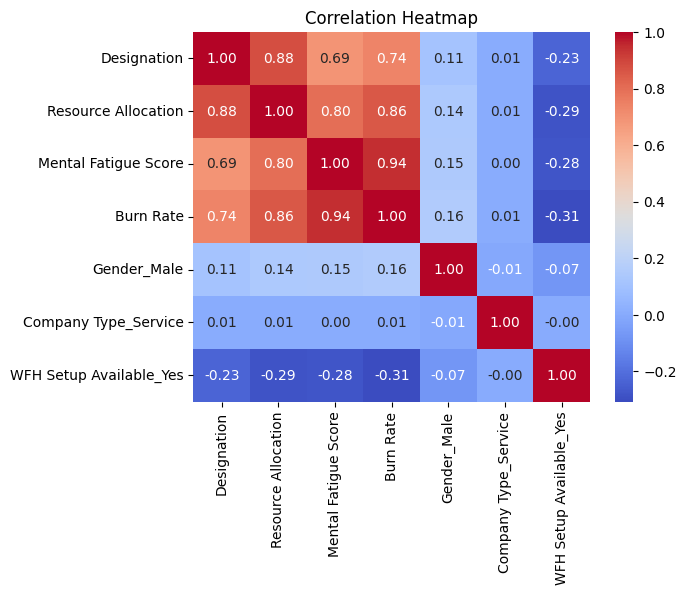

In [119]:
# Compute correlation matrix
correlation = df.corr()

# Heatmap using seaborn
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Splitting the Data Into x & y :

In [120]:
y = df['Burn Rate']
x = df.drop(["Burn Rate"], axis=1)

# Train Test Split :

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Standardizing the Data :

In [123]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

# Linear Regression Model :

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lin_reg = LinearRegression()


In [126]:
lin_reg.fit(x_train, y_train)

LinearRegression()

Predicting the Data

In [127]:
y_pred = lin_reg.predict(x_test)

# Performence Metrics :

In [128]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score

Mean Squared Error :

In [129]:
mean_sqrd_err = mean_squared_error(y_test, y_pred)
mean_sqrd_err

0.003162575622992666

Mean Absolute Error :

In [130]:
mean_abs_err = mean_absolute_error(y_test, y_pred)
mean_abs_err

0.04605840467455547

R2-Score :

In [131]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.9182311349661126

In [188]:
def prediction():
  print("\n\n---------------------------------------------------------------------")
  print("ENTER NEW EMPLOYEE DATA :")
  print("---------------------------------------------------------------------")

  des = int(input("\nDesignation : \n( The Higher the number , the Bigger the Designation ) \nRange[ 0.0 - 5.0 ] : "))
  res_All = float(input("\nResource Allocation :\n( The Higher the number, the more the Resources Allocated to the Employee ) \nRange[ 0.0 - 10.0 ] : "))
  mfs = float(input("\nMental Fatigue Score : \n(The Level of Fatigue the Employee is Facing) \nRange [ 0.0 - 10.0 ] :  "))
  male = input("\nGender_Male [yes, no] : ").strip().lower()
  if male == 'yes':
    male = bool(True)
  else:
    male = bool(False)
  company = input("\nCompany Type_Service [yes, no] : ").strip().lower()
  if company == 'yes':
    company = bool(True)
  else:
    company = bool(False)
  wfh = input("\nWFH Setup Available_Yes [yes, no] : ").strip().lower()
  if wfh == 'yes':
    wfh = bool(True)
  else:
    wfh = bool(False)

  inputs = [{"Designation" : des, "Resource Allocation" : res_All, "Mental Fatigue Score" : mfs, "Gender_Male" : male, "Company Type_Service" : company, "WFH Setup Available_Yes" : wfh}]
  data = pd.DataFrame(inputs)

  data= pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
  prediction = lin_reg.predict(data)
  print("\n\n The Model Predicted : \n BURN RATE : ", prediction[0], "\n\n")




In [190]:
choice = 1

while choice == 1 :
  prediction()
  print("---------------------------------------------------------------------")
  inp = input("Do you Want to Predict Again [ yes, no ] : ")
  print("---------------------------------------------------------------------")5

  if inp.strip().lower() == "yes":
    choice = 1
  else:
    choice = 0
    print("\n\nYou choose : 'No'\n\nProcess Exiting...")



---------------------------------------------------------------------
ENTER NEW EMPLOYEE DATA :
---------------------------------------------------------------------

Designation : 
( The Higher the number , the Bigger the Designation ) 
Range[ 0.0 - 5.0 ] : 5

Resource Allocation :
( The Higher the number, the more the Resources Allocated to the Employee ) 
Range[ 0.0 - 10.0 ] : 6

Mental Fatigue Score : 
(The Level of Fatigue the Employee is Facing) 
Range [ 0.0 - 10.0 ] :  7

Gender_Male [yes, no] : yes

Company Type_Service [yes, no] : yes

WFH Setup Available_Yes [yes, no] : yes


 The Model Predicted : 
 BURN RATE :  0.5739857914825792 


---------------------------------------------------------------------
Do you Want to Predict Again [ yes, no ] : yes
---------------------------------------------------------------------


---------------------------------------------------------------------
ENTER NEW EMPLOYEE DATA :
------------------------------------------------------------